In [9]:
#@ Installing necessary dependencies:
%%capture
!pip install -qU face-alignment torch_snippets
import face_alignment
from torch_snippets import read, show

In [10]:
#@ Importing the image:
!wget -q https://www.dropbox.com/s/lpw10qawsc5ipbn/MyImage.JPG -O MyImage.jpg

In [11]:
# Decidng whether to fetch keypoints landmarks in 2D or 3D:
fa=face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False, device='cpu')

In [12]:
input=read('MyImage.jpg', 1)
preds=fa.get_landmarks(input)[0]
print(preds.shape)

(68, 2)


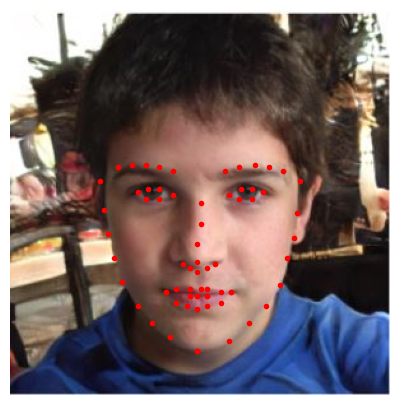

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(5,5))
show(read('MyImage.jpg', 1), ax=ax)
ax.scatter(preds[:, 0], preds[:, 1], marker='.', c='r')
plt.show()

In [15]:
#@ 3D projection:

fa=face_alignment.FaceAlignment(face_alignment.LandmarksType.THREE_D, flip_input=False, device='cpu')
input=read('MyImage.jpg', 1)
preds=fa.get_landmarks(input)[0]

import pandas as pd
df=pd.DataFrame(preds)
df.columns=['x', 'y', 'z']

import plotly.express as px
fig=px.scatter_3d(df, x='x', y='y', z='z')
fig.show()

Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /root/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip
100%|██████████| 91.9M/91.9M [00:04<00:00, 19.3MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-6c4283c0e0.zip" to /root/.cache/torch/hub/checkpoints/depth-6c4283c0e0.zip
100%|██████████| 224M/224M [00:10<00:00, 22.5MB/s]
